In [1]:
# Importing libraries

import pandas as pd

In [16]:
# Importing data

data = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Recommender Engine - Content Based & Association Rule Learning - FP Growth\Buying Pattern.csv')
data.head()

,CustomerID,Product
0,10010,Sugar
1,10007,Milk
2,10006,Milk
3,10005,Sugar
4,10006,Chips


In [5]:
data.shape

(99, 2)

In [3]:
data['CustomerID'].unique()

array([10010, 10007, 10006, 10005, 10004, 10001, 10002, 10009, 10008,
       10003], dtype=int64)

In [4]:
data['CustomerID'].nunique()

10

In [8]:
sqr = lambda x:x*x
sqr(2)

4

In [6]:
data_final = data.groupby('CustomerID').agg({'Product':lambda x:list(set(x))})
# Here everywhere is sigle value, for better output we are converting it into set then list using lambda function
data_final

,Product
CustomerID,
10001,"[Apple, Milk, Chips, Sugar, Beer]"
10002,"[Milk, Chips, Sugar, Beer]"
10003,"[Apple, Milk, Chips, Sugar, Beer]"
10004,"[Apple, Milk, Chips, Sugar, Beer]"
10005,"[Apple, Chips, Sugar, Beer]"
10006,"[Milk, Chips, Sugar]"
10007,"[Apple, Milk, Chips, Sugar, Beer]"
10008,"[Apple, Milk, Beer]"
10009,"[Milk, Chips, Sugar, Beer]"


- For finding rules using FP-Growth we will need package called as fpgrowth_py ! pip install fpgrowth_py

In [10]:
from fpgrowth_py import fpgrowth

In [12]:
# Here we fix our value according to our wish, difference betweem apriori & fp growth is 

frequent, rules = fpgrowth(data_final['Product'], minSupRatio = 0.005, minConf = 0.3)

In [14]:
#According to data fp growth will automatically classify in trees as it is tree based algorith based on probability

association = pd.DataFrame(rules, columns = ['basket', 'next_product', 'probability'])
association

,basket,next_product,probability
0,{Apple},{Sugar},0.833333
1,{Sugar},{Apple},0.555556
2,{Apple},"{Sugar, Beer}",0.833333
3,{Sugar},"{Apple, Beer}",0.555556
4,{Beer},"{Apple, Sugar}",0.555556
...,...,...,...
175,"{Sugar, Beer}","{Milk, Chips}",0.875000
176,"{Milk, Chips, Sugar}",{Beer},0.875000
177,"{Milk, Chips, Beer}",{Sugar},1.000000
178,"{Milk, Sugar, Beer}",{Chips},1.000000


In [15]:
association.sort_values(by = 'probability', ascending = False).head(10)

,basket,next_product,probability
75,"{Apple, Milk, Sugar}",{Chips},1.0
128,{Apple},{Beer},1.0
34,"{Apple, Sugar, Beer}",{Chips},1.0
33,"{Apple, Chips, Beer}",{Sugar},1.0
32,"{Apple, Chips, Sugar}",{Beer},1.0
74,"{Apple, Milk, Chips}",{Sugar},1.0
138,"{Milk, Sugar}",{Chips},1.0
137,"{Milk, Chips}",{Sugar},1.0
27,"{Apple, Sugar}","{Chips, Beer}",1.0
26,"{Apple, Chips}","{Sugar, Beer}",1.0


### Recommender Engine - Content Based

Rating & Votes columns must be in data for building content based recommender engine

In [17]:
# Importing data

imdb = pd.read_csv(r'C:\Users\SHREE\Downloads\Python CODES\Recommender Engine - Content Based & Association Rule Learning - FP Growth\imdb_tvshows.csv')
imdb.head()

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years
0,The Family Man,A working man from the National Investigation ...,42.0,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,45.0,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...",42.0,"Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–
3,StartUp,"A desperate banker, a Haitian-American gang lo...",60.0,"Crime, Thriller","Adam Brody, Edi Gathegi, Otmara Marrero, Krist...",8.0,18165,2016–2018
4,Game of Thrones,Nine noble families fight for control over the...,44.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019


In [18]:
imdb.shape

(3000, 8)

Content Based Recommender Engine Using Weighted Average Method - 

w = Rv + Cm/ v+m

where,

w= weighted score

R - Avg rating for particular data point

v - no of votes

C - avg rating for whole data

M - min votes req for movie for top position

### Data Analysis

In [27]:
# Top show based on Votes

imdb['Votes'].max()

1823966

In [21]:
imdb[imdb['Votes'] == 1823966]

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years
4,Game of Thrones,Nine noble families fight for control over the...,44.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019


In [26]:
# Top 5 shows based on no of people voted

imdb.sort_values(by = 'Votes', ascending = False).head(5)

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years
4,Game of Thrones,Nine noble families fight for control over the...,44.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019
10,Breaking Bad,A high school chemistry teacher diagnosed with...,44.0,"Crime, Drama, Thriller","Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",9.4,1526926,2008–2013
9,The Walking Dead,Sheriff Deputy Rick Grimes wakes up from a com...,44.0,"Drama, Horror, Thriller","Andrew Lincoln, Norman Reedus, Melissa McBride...",8.2,874725,2010–2022
18,Stranger Things,"When a young boy disappears, his mother, a pol...",60.0,"Drama, Fantasy, Horror","Millie Bobby Brown, Finn Wolfhard, Winona Ryde...",8.7,864302,2016–
122,Sherlock,A modern update finds the famous sleuth and hi...,88.0,"Crime, Drama, Mystery","Benedict Cumberbatch, Martin Freeman, Una Stub...",9.1,830345,2010–2017


In [25]:
# Top 5 shows based on Rating

imdb.sort_values(by = 'Rating', ascending = False).head(5)

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years
173,The Chosen,A charismatic fisherman drowning in debt. A tr...,54.0,"Drama, History","Shahar Isaac, Jonathan Roumie, Paras Patel, Ge...",9.7,16611,2017–
298,Bluey,The slice-of-life adventures of an Australian ...,7.0,"Animation, Family","David McCormack, Melanie Zanetti, Charlotte St...",9.7,3005,2018–
931,The Last Drive-In with Joe Bob Briggs,Joe Bob is back! Watching B-Movies and giving ...,43.0,"Comedy, Fantasy, Horror","John Bloom, Diana Prince, Yuki Nakamura, John ...",9.5,993,2018–
1125,The Edge of Sleep,After befriending a mysterious horse during a ...,43.0,Mystery,"Alex Essoe, Mark Fischbach, Cara Santana, Vict...",9.4,43,2019
2934,Best of the Worst,"Anthony and Ashly Burch enjoy video games, sur...",22.0,"Comedy, Talk-Show","Jay Bauman, Rich Evans, Mike Stoklasa, Jack Pa...",9.4,2782,2013–


In [30]:
# Bottom 5 shows based on Rating

imdb.sort_values(by = 'Rating', ascending = True).head(5)

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years
1667,A Little Late with Lilly Singh,"Set in the 1960s, this British medical drama f...",23.0,"Comedy, Talk-Show","Lilly Singh, Alison Sieke, Henry Dittman, Rain...",1.6,6464,2019–2021
837,Metástasis,A Colombian remake of the U.S. TV show Breakin...,42.0,"Crime, Drama, Thriller","Constanza Hernández, Diego Trujillo, Roberto U...",2.3,1940,2014
2522,La rosa de Guadalupe,Stories about people who get into problems who...,30.0,Drama,"Susana Lozano, Zahira de Quevedo, Elena Carras...",2.7,757,2008–
1338,Ben 10,Ben 10 is the fifth iteration of the Ben 10 fr...,60.0,"Animation, Short, Action","Tara Strong, Montse Hernandez, David Kaye, Rog...",2.7,3276,2016–2021
236,Keeping Up with the Kardashians,A peek inside the exploits and privileged priv...,44.0,"Drama, Family, Reality-TV","Khloé Kardashian, Kim Kardashian, Kourtney Kar...",2.8,27331,2006–2021


- We wil calculate all the parameters from formula based on Average Rating, we can also calculate by Average Votes (C)

In [33]:
R = imdb['Rating']
V = imdb['Votes']
C = imdb['Rating'].mean()
# For finding min votes req we will find 90 percentile value
m = imdb['Votes'].quantile(0.90)

In [39]:
import numpy as np

print('Average Rating for shows are :', np.round(C,2))

Average Rating for shows are : 7.31


In [38]:
print('Mininum votes required for show to be present in final data is :', m)

Mininum votes required for show to be present in final data is : 44046.39999999997


We will filter the data which has min votes using condition

In [40]:
condition = imdb['Votes'] > m
imdb_final = imdb[condition]

In [41]:
print('The final shape of dataframe is :', imdb_final.shape)

The final shape of dataframe is : (300, 8)


### Calculating the Weighted Score

In [42]:
imdb_final['Weighted Score'] = ((R*V)+(C+m))/(V+m)

C:\Users\SHREE\AppData\Local\Temp/ipykernel_2772/1237905656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_final['Weighted Score'] = ((R*V)+(C+m))/(V+m)


In [43]:
imdb_final.head()

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years,Weighted Score
0,The Family Man,A working man from the National Investigation ...,42.0,"Action, Comedy, Drama","Manoj Bajpayee, Samantha Akkineni, Priyamani, ...",8.8,57632,2019–,5.421164
1,Lucifer,Lucifer Morningstar has decided he's had enoug...,45.0,"Crime, Drama, Fantasy","Tom Ellis, Lauren German, Lesley-Ann Brandt, K...",8.1,252826,2016–,7.046611
2,The Handmaid's Tale,"Set in a dystopian future, a woman is forced t...",42.0,"Drama, Sci-Fi, Thriller","Elisabeth Moss, Yvonne Strahovski, Joseph Fien...",8.4,187007,2017–,6.989348
4,Game of Thrones,Nine noble families fight for control over the...,44.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019,9.104296
6,Grey's Anatomy,A drama centered on the personal and professio...,30.0,"Drama, Romance","Ellen Pompeo, Chandra Wilson, James Pickens Jr...",7.5,261340,2005–,6.562518


In [45]:
# Sorting tv shows based on highest weighted scores

imdb_final.sort_values(by = 'Weighted Score', ascending = False).head(10)

,Title,About,EpisodeDuration(in Minutes),Genres,Actors,Rating,Votes,Years,Weighted Score
10,Breaking Bad,A high school chemistry teacher diagnosed with...,44.0,"Crime, Drama, Thriller","Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",9.4,1526926,2008–2013,9.164488
4,Game of Thrones,Nine noble families fight for control over the...,44.0,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",9.3,1823966,2011–2019,9.104296
122,Sherlock,A modern update finds the famous sleuth and hi...,88.0,"Crime, Drama, Mystery","Benedict Cumberbatch, Martin Freeman, Una Stub...",9.1,830345,2010–2017,8.691981
42,Rick and Morty,An animated series that follows the exploits o...,23.0,"Animation, Adventure, Comedy","Justin Roiland, Chris Parnell, Spencer Grammer...",9.2,395283,2013–,8.377899
18,Stranger Things,"When a young boy disappears, his mother, a pol...",60.0,"Drama, Fantasy, Horror","Millie Bobby Brown, Finn Wolfhard, Winona Ryde...",8.7,864302,2016–,8.326630
70,True Detective,Seasonal anthology series in which police inve...,55.0,"Crime, Drama, Mystery","Vince Vaughn, Colin Farrell, Rachel McAdams, T...",8.9,510795,2014–2019,8.272867
63,The Wire,"The Baltimore drug scene, as seen through the ...",59.0,"Crime, Drama, Thriller","Dominic West, Lance Reddick, Sonja Sohn, Wende...",9.3,294150,2002–2008,8.219037
13,The Office,A mockumentary on a group of typical office wo...,60.0,Comedy,"Steve Carell, Jenna Fischer, John Krasinski, R...",8.9,441951,2005–2013,8.184031
35,Dexter,"By day, mild-mannered Dexter is a blood-spatte...",53.0,"Crime, Drama, Mystery","Michael C. Hall, Jennifer Carpenter, David Zay...",8.6,658516,2006–2021,8.123537
46,Black Mirror,"An anthology series exploring a twisted, high-...",60.0,"Drama, Sci-Fi, Thriller","Daniel Lapaine, Hannah John-Kamen, Michaela Co...",8.8,462587,2011–,8.121887


Content Based will recommended similar content movies based on weighted scores

(4.0, 10.0)

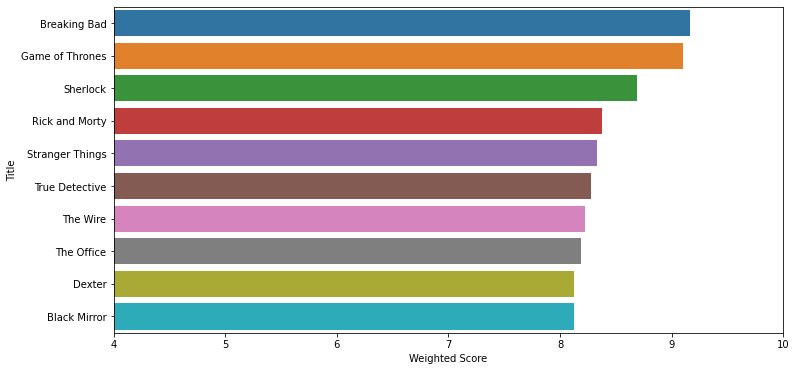

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = imdb_final.sort_values(by = 'Weighted Score', ascending = False).head(10)
plt.figure(figsize = (12,6))
sns.barplot(x = top10['Weighted Score'], y = top10['Title'])
plt.xlim(4,10)

Conclusion - 

These are the top 10 showss based on Weighted Score, we can suggest shows if the user watchesh show close to these shows.
For ex. if a user watches the wire we can recommend them true detective or the office